In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.sandbox.stats.multicomp import multipletests 
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%,
известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).
Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? 
Округлите до четырёх знаков после десятичной точки. 

In [2]:
df=pd.read_csv('C:\\Study\\Stats\\week_3\\illiteracy.txt', header=0, sep='\t')

FileNotFoundError: File b'C:\\Study\\Stats\\week_3\\illiteracy.txt' does not exist

In [ ]:
df.corr()

In [161]:
df.corr('spearman') 

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения 
(по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). 
Есть ли связь между жёсткостью воды и средней годовой смертностью? 
Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх 
знаков после десятичной точки.
Чем выше концентрация кальция, тем жёстче вода. 
Города дополнительно поделены на северные и южные.

In [162]:
df=pd.read_csv('C:\Study\Stats\week_3\water.txt', sep='\t')

In [163]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [164]:
df.corr()['mortality'].hardness

-0.65484862320424642

In [165]:
df.corr('spearman')['mortality'].hardness

-0.63166461891665016

In [166]:
df_south=df[df['location']=='South']
df_north=df[df['location']=='North']

In [167]:
print('Pearson south:', df_south.corr()['mortality'].hardness)
print('Pearson north:', df_north.corr()['mortality'].hardness)

Pearson south: -0.602153271548
Pearson north: -0.368597838329


Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; 
реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.
Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. 
Округлите значение до трёх знаков после десятичной точки.

In [168]:
def corr_matthews(a,b,c,d):
    return (a*d-b*c)/np.sqrt((a+b)*(a+c)*(b+d)*(c+d))

In [169]:
print(corr_matthews(203,718,239,515))

-0.109002374587


Проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости

In [29]:
from scipy.stats import chi2_contingency
import scipy

In [171]:
input_data=np.array(([203,718],[239,515]))

In [172]:
res=chi2_contingency(input_data)

In [173]:
res[1]

1.0558987006638725e-05

Отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? 
Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. 
Чему равна его нижняя граница? 

In [174]:
n1=239+515
n2=203+718
a=239
b=203
p1=a/n1
p2=b/n2

In [175]:
def proportions_confint_diff_ind(n1,n2,p1,p2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)      
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/n1 + p2 * (1 - p2)/n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/n1 + p2 * (1 - p2)/ n2)
    return (left_boundary, right_boundary)

In [176]:
print(proportions_confint_diff_ind(n1,n2,p1,p2))

(0.053905233215813156, 0.13922183141523897)


In [177]:
def proportions_diff_z_stat_ind(n1, n2, p1, p2):
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [178]:
z_stat=proportions_diff_z_stat_ind(n1, n2, p1, p2)

In [179]:
print(2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat))))

8.15345308958e-06


Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? 
Округлите ответ до четырёх знаков после десятичной точки.

In [26]:
arr=np.array(([197, 111, 33],[382,685,331],[110,342,333]))

In [181]:
res=chi2_contingency(arr)

In [182]:
res[0]

293.68311039689746

In [183]:
res[1]

2.4964299580093467e-62

In [30]:
def cramers_stat(tab):
    chi2 = chi2_contingency(tab)[0]
    n = tab.sum()
    return np.sqrt(chi2 / (n*(min(tab.shape)-1)))
cramers_stat(arr)

0.2412013934500338

Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной 
оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. 
На каждом датасете был посчитан AUC каждого классификатора.
Используя критерий знаковых рангов, проведите попарное сравнение каждого классификатора с каждым. 
Выберите два классификатора, различие между которыми наиболее статистически значимо

In [185]:
df=pd.read_csv('C:\\Study\\Stats\\week_3\\AUCs.txt', sep='\t')

In [186]:
df

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898
5,iris,0.936,0.931,0.916,0.931
6,liver disorders,0.661,0.668,0.609,0.685
7,lung cancer,0.583,0.583,0.563,0.625
8,lymphography,0.775,0.838,0.866,0.875
9,mushroom,1.000,1.000,1.000,1.000


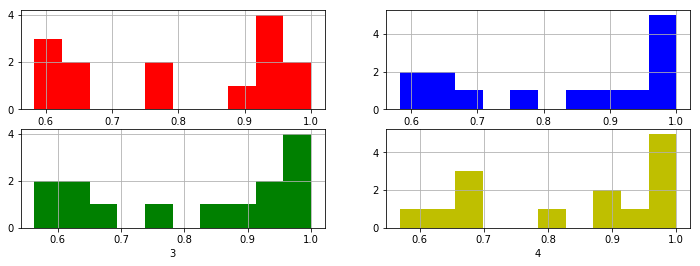

In [187]:
pylab.figure(figsize=(12,4))

pylab.subplot(2,2,1)
pylab.grid()
pylab.hist(df['C4.5'], color = 'r')
pylab.xlabel('1')

pylab.subplot(2,2,2)
pylab.grid()
pylab.hist(df['C4.5+m'], color = 'b')
pylab.xlabel('2')

pylab.subplot(2,2,3)
pylab.grid()
pylab.hist(df['C4.5+cf'], color = 'g')
pylab.xlabel('3')

pylab.subplot(2,2,4)
pylab.grid()
pylab.hist(df['C4.5+m+cf'], color = 'y')
pylab.xlabel('4')

pylab.show()

In [188]:
columns=df.columns.values[1:]
columns

array(['C4.5', 'C4.5+m', 'C4.5+cf', 'C4.5+m+cf'], dtype=object)

In [189]:
corr_data=[]
for i, col_1 in enumerate(columns):
    for j, col_2 in enumerate(columns):
        if j>i:
            M,p=(stats.wilcoxon(df[col_2] - df[col_1]))
            corr_data.append([col_1, col_2, M, p])


In [190]:
 model_correlation=pd.DataFrame.from_records(corr_data)
 model_correlation.columns=['clf1','clf2','val','p_value']   

In [191]:
reject, p_corrected, a1, a2 = multipletests(model_correlation.p_value,alpha = 0.05, method = 'fdr_bh')
model_correlation['p_fdr_bh']=p_corrected
reject, p_corrected, a1, a2 = multipletests(model_correlation.p_value,alpha = 0.05, method = 'holm')
model_correlation['p_holm']=p_corrected

In [192]:
model_correlation

,clf1,clf2,val,p_value,p_fdr_bh,p_holm
0,C4.5,C4.5+m,6.5,0.010757,0.045818,0.064543
1,C4.5,C4.5+cf,43.0,0.861262,0.861262,0.861262
2,C4.5,C4.5+m+cf,11.0,0.015906,0.045818,0.079532
3,C4.5+m,C4.5+cf,17.0,0.046333,0.069499,0.138998
4,C4.5+m,C4.5+m+cf,22.0,0.327826,0.393391,0.655651
5,C4.5+cf,C4.5+m+cf,10.0,0.022909,0.045818,0.091636


Давайте проанализируем данные опроса 4361 женщин из Ботсваны
Давайте научимся оценивать количество детей ceb по остальным признакам.
Сколько разных значений принимает признак religion?

In [3]:
df=pd.read_csv('C:\\Study\\Statistics\\Week3\\botswana.tsv', sep='\t')

In [4]:
np.size(df['religion'].unique())

4

In [5]:
df_mod=df.dropna()
df_mod.shape

(1834, 15)

In [6]:
df.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [7]:
df['nevermarr']=df['agefm'].apply(lambda x: 1 if np.isnan(x) else 0)
df=df.drop(['evermarr'], axis=1)
df['agefm']=df['agefm'].fillna(0)
df.loc[(df['nevermarr']==1)&(df['heduc'].isnull()),'heduc']=-1

In [8]:
df.isnull().sum()

ceb            0
age            0
educ           0
religion       0
idlnchld     120
knowmeth       7
usemeth       71
agefm          0
heduc        123
urban          0
electric       3
radio          2
tv             2
bicycle        3
nevermarr      0
dtype: int64

In [9]:

df['idlnchld_noans']=df['idlnchld'].apply(lambda x: 1 if np.isnan(x) else 0)
df['idlnchld']=df['idlnchld'].fillna(-1)
df['heduc_noans']=df['heduc'].apply(lambda x: 1 if np.isnan(x) else 0)
df['heduc']=df['heduc'].fillna(-2)
df['usemeth_noans']=df['usemeth'].apply(lambda x: 1 if np.isnan(x) else 0)
df['usemeth']=df['usemeth'].fillna(-1)

In [10]:
df=df.dropna()

In [11]:
df.shape[0]*df.shape[1]

78264

In [12]:
df.columns

Index(['ceb', 'age', 'educ', 'religion', 'idlnchld', 'knowmeth', 'usemeth',
       'agefm', 'heduc', 'urban', 'electric', 'radio', 'tv', 'bicycle',
       'nevermarr', 'idlnchld_noans', 'heduc_noans', 'usemeth_noans'],
      dtype='object')

Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. 
Какой получился коэффициент детерминации R2? 
Округлите до трёх знаков после десятичной точки.

In [13]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

C:\Users\aguka\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
m1 = smf.ols('ceb ~ age+educ+religion+idlnchld+knowmeth+usemeth+agefm+heduc+urban\
              +electric+radio+tv+bicycle+nevermarr+idlnchld_noans+heduc_noans+usemeth_noans', 
             data=df)
fitted = m1.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sun, 24 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:09:53   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

C:\Users\aguka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


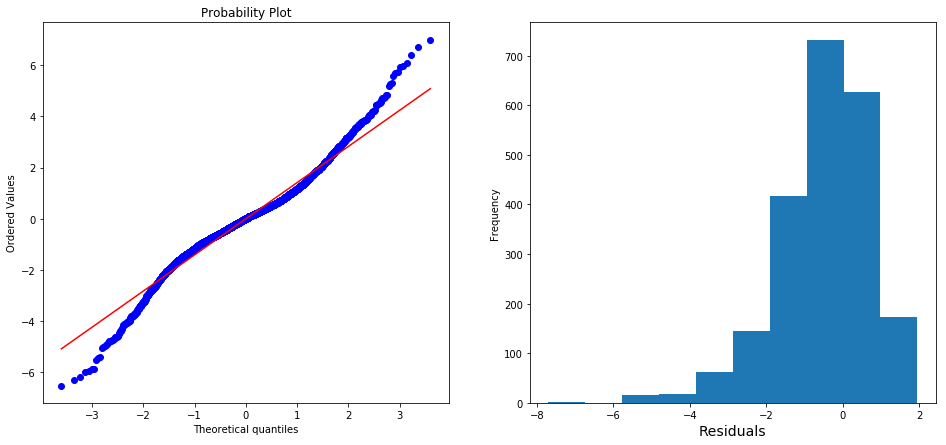

In [15]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [16]:
print ('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


C:\Users\aguka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


In [17]:
m2= smf.ols('ceb ~ age+educ+religion+idlnchld+knowmeth+usemeth+agefm+heduc+urban\
              +electric+radio+tv+bicycle+nevermarr+idlnchld_noans+heduc_noans+usemeth_noans', 
             data=df)
fitted = m2.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sun, 24 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:09:59   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [18]:
df=df.drop(['religion','radio','tv'],axis=1)

In [19]:
m3 = smf.ols('ceb ~ age+educ+idlnchld+knowmeth+usemeth+agefm+heduc+urban\
              +electric+bicycle+nevermarr+idlnchld_noans+heduc_noans+usemeth_noans', 
             data=df)
fitted = m3.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Sun, 24 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:10:01   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [20]:
print ('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


C:\Users\aguka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


In [21]:
m4 = smf.ols('ceb ~ age+educ+idlnchld+knowmeth+usemeth+agefm+heduc+urban\
              +electric+bicycle+nevermarr+idlnchld_noans+heduc_noans+usemeth_noans', 
             data=df)
fitted = m4.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sun, 24 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:10:03   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [22]:
print ("F=%f, p=%f, k1=%f" % m2.fit().compare_f_test(m4.fit()))

F=0.919236, p=0.467231, k1=5.000000


In [23]:
df=df.drop(['usemeth','usemeth_noans'], axis=1)

In [24]:
m5 = smf.ols('ceb ~ age+educ+idlnchld+knowmeth+agefm+heduc+urban\
              +electric+bicycle+nevermarr+idlnchld_noans+heduc_noans', 
             data=df)
fitted = m5.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Sun, 24 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:10:06   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.

In [25]:
print ( m3.fit().compare_f_test(m5.fit()))

(92.890582301098021, 3.1552009480371243e-40, 2.0)
